In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
# Load the trained model from the saved file
reg = joblib.load("reg_model.pkl")
df = pd.read_csv('data/fake_dataset.csv')

In [2]:
df

,Rain,Temp.max,Temp.min,Label
0,0.870598,1.305623,-0.427743,0
1,0.330761,0.983970,-0.579373,1
2,-1.347897,-1.251386,0.925968,2
3,1.547872,-0.179754,0.005510,3
4,-0.616637,-0.743406,-0.634491,4
...,...,...,...,...
995,-1.080778,0.417388,-0.667584,995
996,0.875527,1.243494,-1.066585,996
997,-2.226282,0.110584,-0.639156,997
998,-1.946111,-0.327084,-0.761968,998


In [3]:
core_weather = df[["Rain","Temp.max","Temp.min"]].copy()

In [4]:
core_weather.columns = ["Rain","Temp_max","Temp_min"]

In [5]:
predictors = ["Rain","Temp_max","Temp_min"]

In [6]:
test = core_weather.loc[900:]

In [7]:
predictions = reg.predict(test[predictors])

In [8]:
predictions

array([12.11080036,  6.64581108,  9.50259644,  9.09829998,  9.35039704,
        8.74826404,  9.27214573,  9.10430783, 12.6489584 ,  5.48644606,
        9.55942773, 12.40499512,  7.32624725,  7.82453216,  6.746072  ,
       10.59155505,  6.04983284,  9.23324997, 12.699238  , 11.68119966,
        9.29691152,  6.54571989, 12.58305491,  9.86959813, 11.36278489,
        6.20782417, 12.49696326,  8.26976384, 11.25633645,  9.30113944,
       13.11135688,  5.89951431, 15.65045766, 10.47306148,  9.50912904,
       12.74774757, 12.30989268,  9.20856768, 13.49437434, 10.99818413,
       17.51388111, 14.39975183, 10.13952152,  8.33966476, 14.72208966,
        9.43120566, 10.26777421, 11.46518305, 10.73640173,  5.55503807,
       14.00172303,  9.2955846 ,  9.91560388,  8.47483398, 11.03703758,
        9.55997431, 11.13600209, 14.21340415, 10.68604739,  9.99009369,
       11.10988269,  7.88332417,  6.82322169, 13.30581313,  8.5567467 ,
        9.34525442, 10.51939512, 11.8447672 , 11.30585868,  8.44

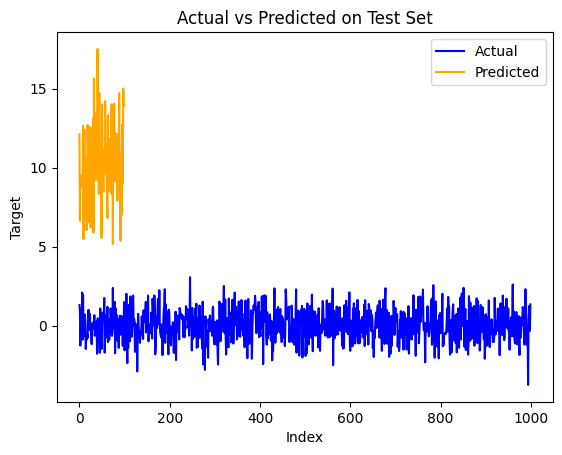

In [9]:
plt.plot(core_weather.index, core_weather["Temp_max"], label="Actual", color="blue")
plt.plot(predictions, label="Predicted", color="orange")
plt.title("Actual vs Predicted on Test Set")
plt.xlabel("Index")
plt.ylabel("Target")
plt.legend()
plt.show()